In [1]:
import sys
sys.path.append('..')

import src as odyn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../data/simulations_from_paper/"

reaches = [0,2,4,6,8,10]
phases = [0,10,20,40,60]

# Initialization

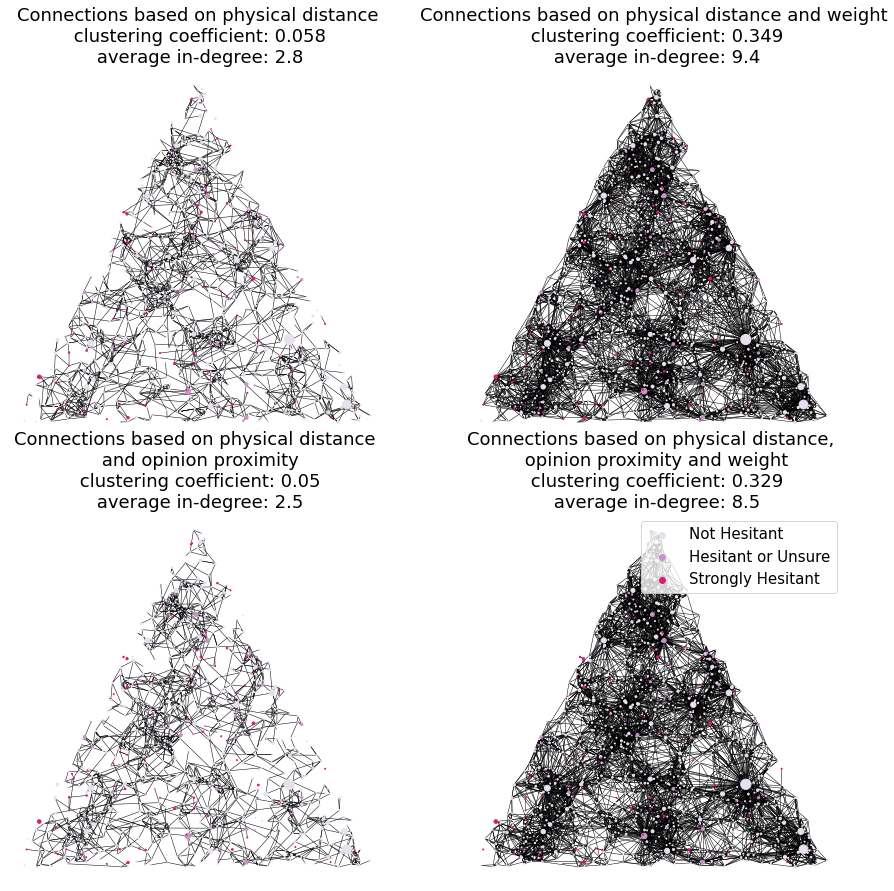

In [3]:
fig, ax = plt.subplots(2,2,figsize = (15,15))

attr_dict = {"FF":"Connections based on physical distance",
             "TF":"Connections based on physical distance and weight",
             "FT":"Connections based on physical distance \n and opinion proximity",
             "TT":"Connections based on physical distance, \n opinion proximity and weight"
            }

belief_df = pd.read_parquet(path + "initialization/belief_df.pq")
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])


for i in range(len(attr_dict.keys())):
    attr = list(attr_dict.keys())[i]
    adjacency_df = pd.read_parquet(path + "initialization/adjacency_df_{}.pq".format(attr))
    adjacency_df.columns = [int(i) for i in adjacency_df.columns]
    cc, md = model.compute_network_stats(adjacency_df)
    # Plot people.
    ax[i//2,i%2].scatter(belief_df["x"], belief_df["y"], 
               s = [int(w) for w in belief_df["weight"].values],
               c = [odyn.COLOR_MAP[b] for b in belief_df["belief"].values])

    for j in belief_df.index:
        for k in np.where(adjacency_df.loc[j,:] == 1)[0]:
            ax[i//2,i%2].plot((belief_df.loc[j,"x"], belief_df.loc[k,"x"]),
                            (belief_df.loc[j,"y"], belief_df.loc[k,"y"]),                            
                            color = "k", lw = .5, zorder = 0)

    # Turn off axes
    ax[i//2,i%2].set_axis_off()

    # Add title
    title = attr_dict[attr]
    title = title + "\n clustering coefficient: " + str(
        np.around(cc, decimals = 3)) + "\n average in-degree: " + str(
        np.around(md, decimals = 1))
    ax[i//2,i%2].set_title(title, fontsize = 18)

    # Add legend
    ax[i//2,i%2].scatter([],[],color = odyn.COLOR_MAP[0], label = "Not Hesitant")
    ax[i//2,i%2].scatter([],[],color = odyn.COLOR_MAP[1], label = "Hesitant or Unsure")
    ax[i//2,i%2].scatter([],[],color = odyn.COLOR_MAP[2], label = "Strongly Hesitant")     
plt.legend(loc = "best",prop={"size":15})
plt.axis()

plt.show()

# Simulation Results
## Skewed

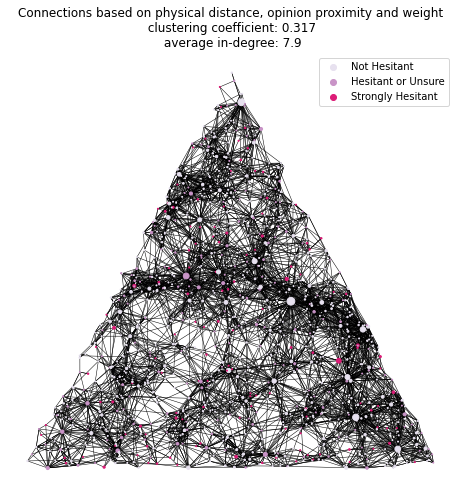

In [4]:
al_path = path + "al/montgomery/"
al_model = odyn.OpinionNetworkModel()
al_model.agent_df = pd.read_parquet(al_path + "agent_df.pq")
al_model.belief_df = pd.read_parquet(al_path + "belief_df.pq")

al_model.prob_df = pd.read_parquet(al_path + "prob_df.pq")

al_model.adjacency_df = pd.read_parquet(al_path + "adjacency_df.pq")
al_model.adjacency_df.columns = [int(c) for c in al_model.adjacency_df.columns]

cc, md = al_model.compute_network_stats(al_model.adjacency_df)
al_model.clustering_coefficient = cc
al_model.mean_degree = md
odyn.plot_network(al_model)

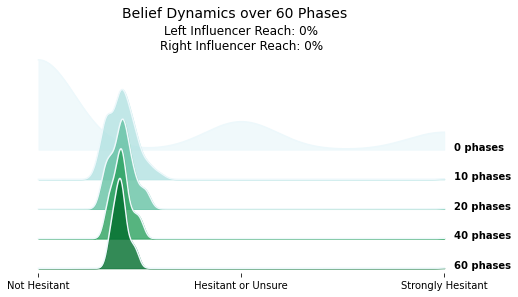

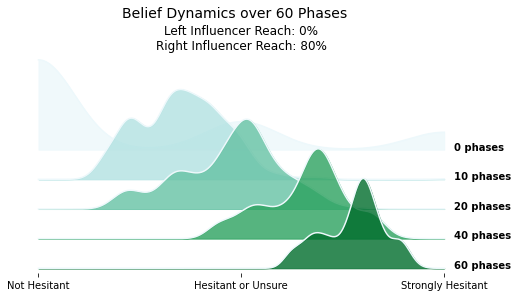

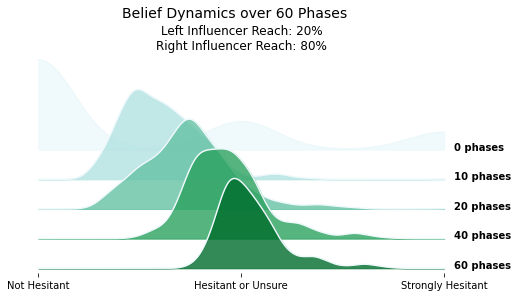

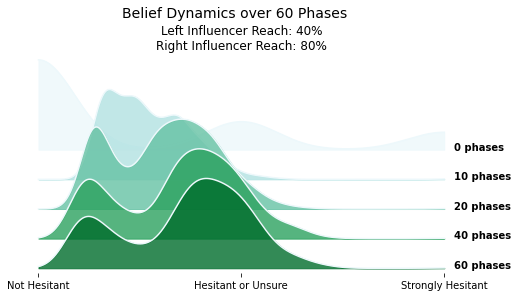

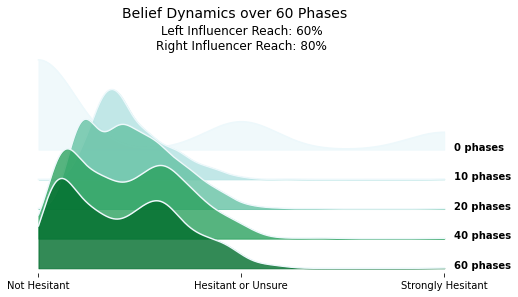

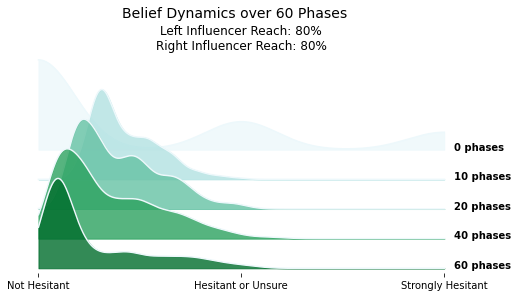

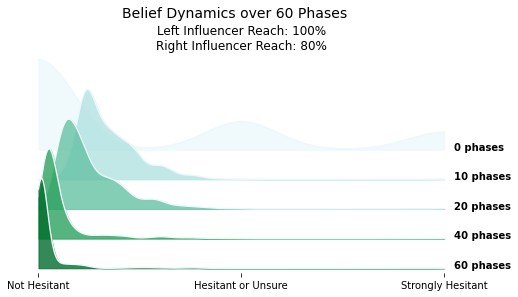

In [5]:
reach_dict = {0:0,2:0}
df = pd.read_parquet(al_path + "simulation_results_none.pq")

df.columns = [int(c) for c in df.columns]
odyn.get_ridge_plot(dynamic_belief_df = df, 
                    phases = phases, 
                    reach_dict = reach_dict)

for i in range(len(reaches)):
    r = reaches[i]
    reach_dict = {0:r/10,2:.8}
    df = pd.read_parquet(al_path + "simulation_results_{}.pq".format(r))
    df.columns = [int(c) for c in df.columns]
    odyn.get_ridge_plot(dynamic_belief_df = df, 
                        phases = phases, 
                        reach_dict = reach_dict)

## Accepting

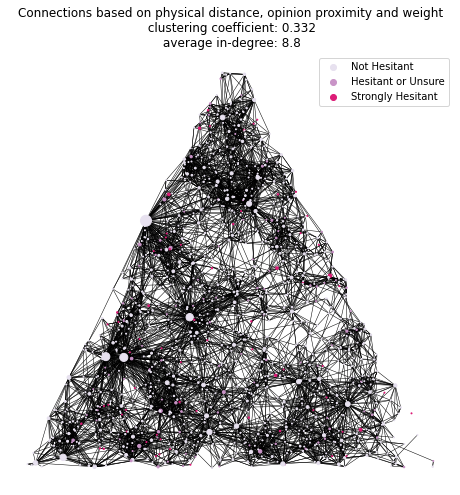

In [6]:
or_path = path + "or/multnomah/"
or_model = odyn.OpinionNetworkModel()
or_model.agent_df = pd.read_parquet(or_path + "agent_df.pq")
or_model.belief_df = pd.read_parquet(or_path + "belief_df.pq")
or_model.prob_df = pd.read_parquet(or_path + "prob_df.pq")

or_model.adjacency_df = pd.read_parquet(or_path + "adjacency_df.pq")
or_model.adjacency_df.columns = [int(c) for c in or_model.adjacency_df.columns]


cc, md = or_model.compute_network_stats(or_model.adjacency_df)
or_model.clustering_coefficient = cc
or_model.mean_degree = md
odyn.plot_network(or_model)

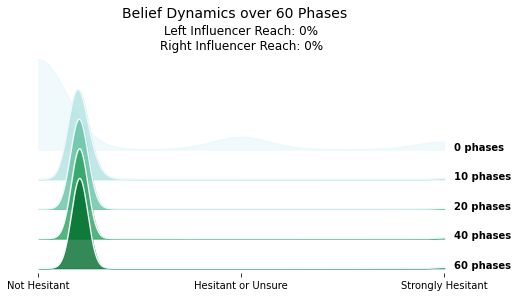

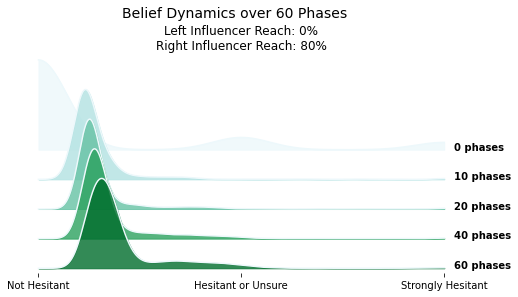

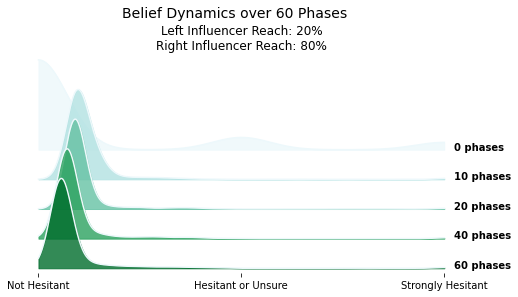

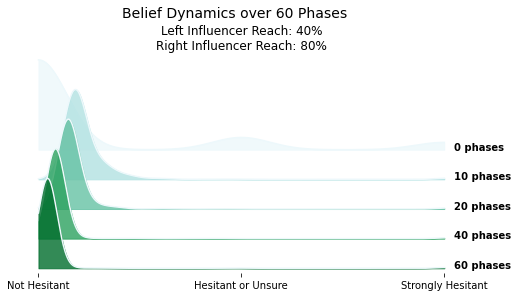

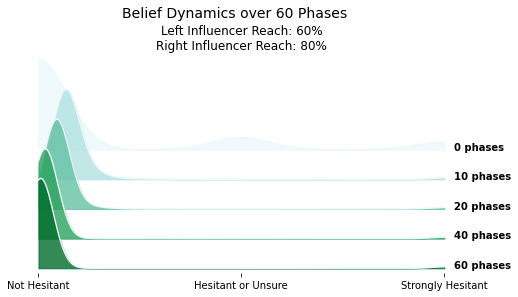

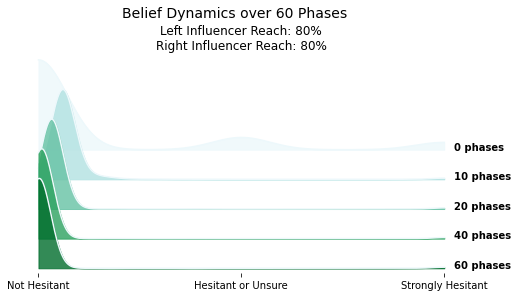

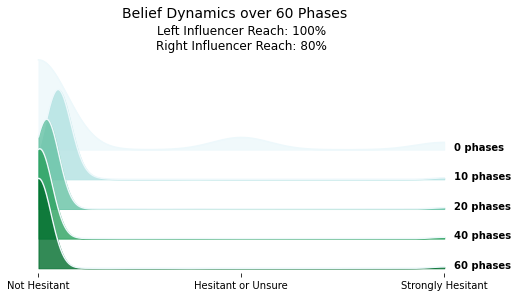

In [7]:
reach_dict = {0:0,2:0}
df = pd.read_parquet(or_path + "simulation_results_none.pq")
df.columns = [int(c) for c in df.columns]
odyn.get_ridge_plot(dynamic_belief_df = df, 
                    phases = phases, 
                    reach_dict = reach_dict)

for i in range(len(reaches)):
    r = reaches[i]
    reach_dict = {0:r/10,2:.8}
    df = pd.read_parquet(or_path + "simulation_results_{}.pq".format(r))
    df.columns = [int(c) for c in df.columns]
    odyn.get_ridge_plot(dynamic_belief_df = df, 
                        phases = phases, 
                        reach_dict = reach_dict)

## Symmetric

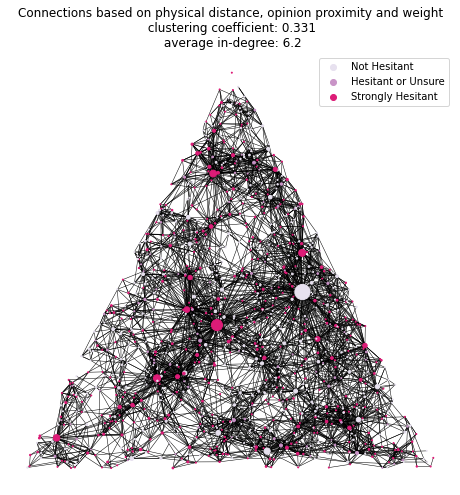

In [8]:
sym_path = path + "sym/no_name_county/"
sym_model = odyn.OpinionNetworkModel()
sym_model.agent_df = pd.read_parquet(sym_path + "agent_df.pq")
sym_model.belief_df = pd.read_parquet(sym_path + "belief_df.pq")
sym_model.prob_df = pd.read_parquet(sym_path + "prob_df.pq")

sym_model.adjacency_df = pd.read_parquet(sym_path + "adjacency_df.pq")
sym_model.adjacency_df.columns = [int(c) for c in sym_model.adjacency_df.columns]


cc, md = sym_model.compute_network_stats(sym_model.adjacency_df)
sym_model.clustering_coefficient = cc
sym_model.mean_degree = md
odyn.plot_network(sym_model)

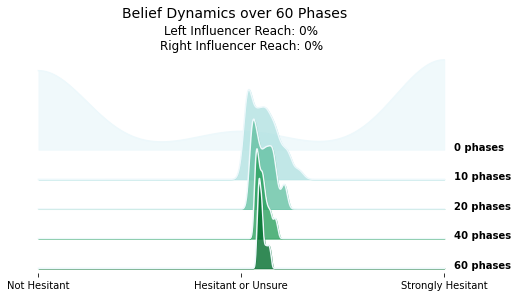

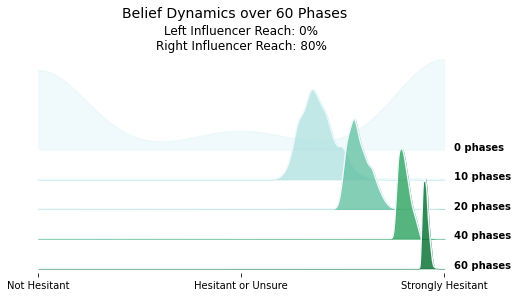

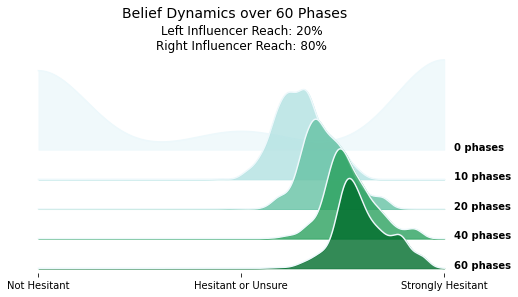

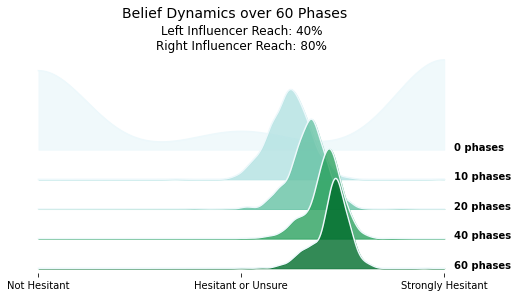

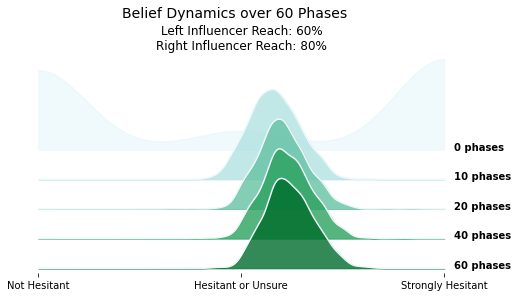

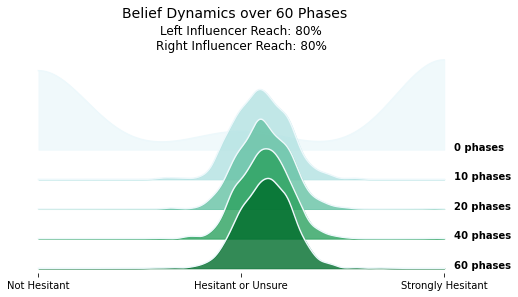

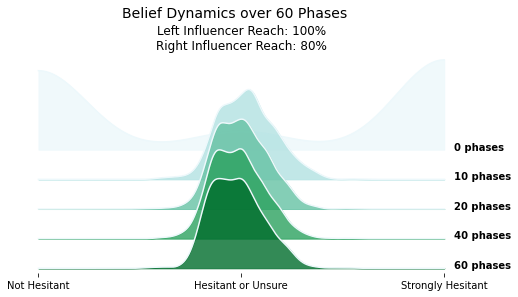

In [9]:
reach_dict = {0:0,2:0}
df = pd.read_parquet(sym_path + "simulation_results_none.pq")
df.columns = [int(c) for c in df.columns]
odyn.get_ridge_plot(dynamic_belief_df = df, 
                    phases = phases, 
                    reach_dict = reach_dict)

for i in range(len(reaches)):
    r = reaches[i]
    reach_dict = {0:r/10,2:.8}
    df = pd.read_parquet(sym_path + "simulation_results_{}.pq".format(r))
    df.columns = [int(c) for c in df.columns]
    odyn.get_ridge_plot(dynamic_belief_df = df, 
                        phases = phases, 
                        reach_dict = reach_dict)

## Skeptical

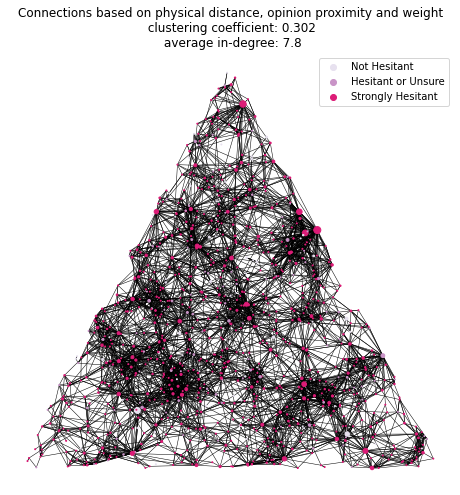

In [10]:
anti_path = path + "anti/no_name_county/"
anti_model = odyn.OpinionNetworkModel()
anti_model.agent_df = pd.read_parquet(anti_path + "agent_df.pq")
anti_model.belief_df = pd.read_parquet(anti_path + "belief_df.pq")
anti_model.prob_df = pd.read_parquet(anti_path + "prob_df.pq")

anti_model.adjacency_df = pd.read_parquet(anti_path + "adjacency_df.pq")
anti_model.adjacency_df.columns = [int(c) for c in anti_model.adjacency_df.columns]


cc, md = anti_model.compute_network_stats(anti_model.adjacency_df)
anti_model.clustering_coefficient = cc
anti_model.mean_degree = md
odyn.plot_network(anti_model)

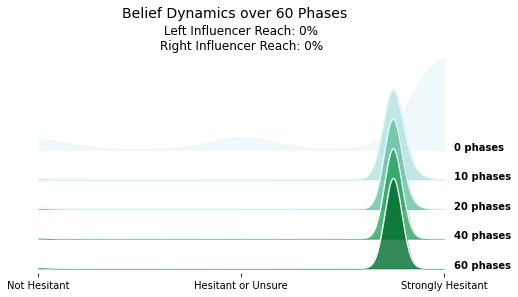

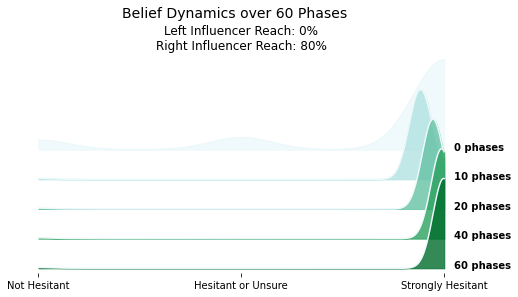

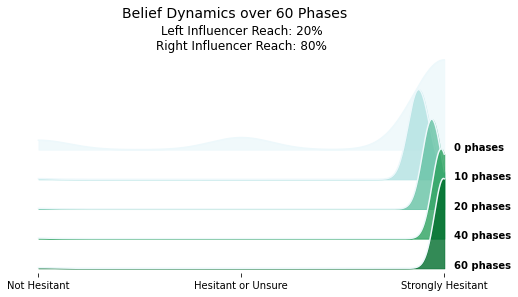

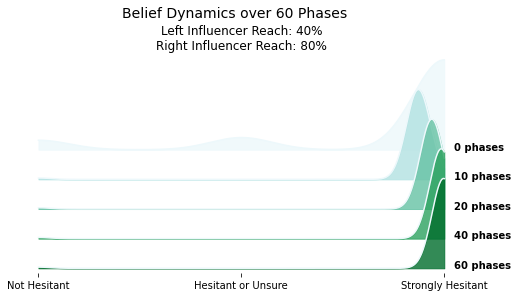

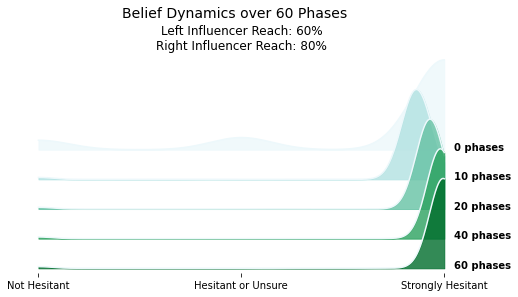

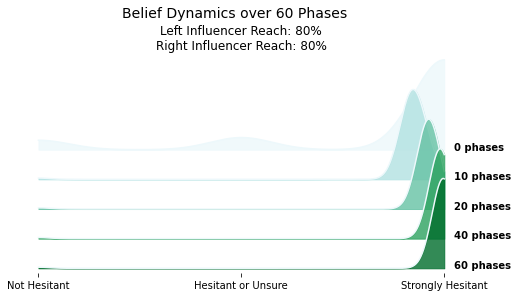

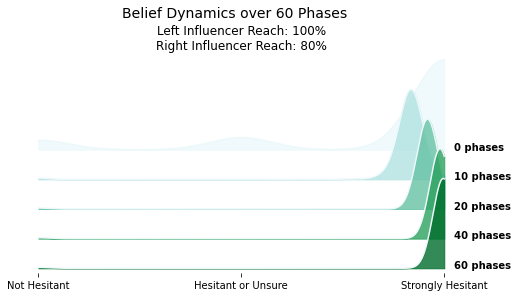

In [11]:
reach_dict = {0:0,2:0}
df = pd.read_parquet(anti_path + "simulation_results_none.pq")
df.columns = [int(c) for c in df.columns]
odyn.get_ridge_plot(dynamic_belief_df = df, 
                    phases = phases, 
                    reach_dict = reach_dict)

for i in range(len(reaches)):
    r = reaches[i]
    reach_dict = {0:r/10,2:.8}
    df = pd.read_parquet(anti_path + "simulation_results_{}.pq".format(r))
    df.columns = [int(c) for c in df.columns]
    odyn.get_ridge_plot(dynamic_belief_df = df, 
                        phases = phases, 
                        reach_dict = reach_dict)

## All Plots

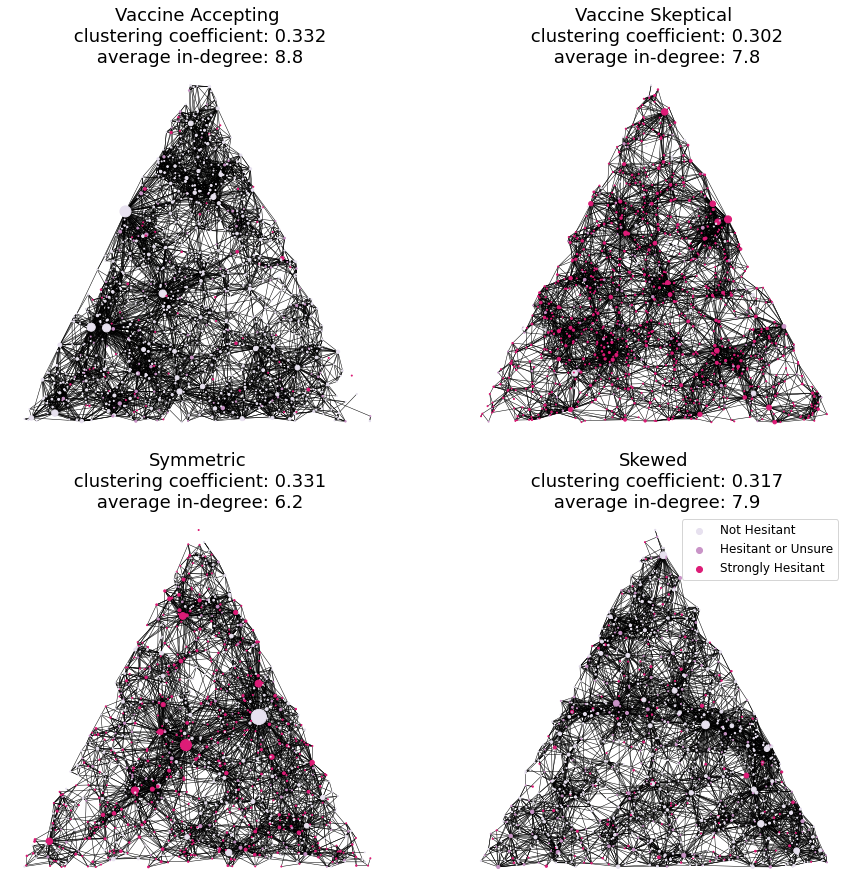

In [12]:
fig, ax = plt.subplots(2,2,figsize = (15,15))

models = [or_model, anti_model, sym_model, al_model]
titles = [
          "Vaccine Accepting",
          "Vaccine Skeptical",
          "Symmetric",
          "Skewed"
         ]

for i in range(len(models)):
    model = models[i]
    belief_df = model.belief_df
    op = model.include_opinion
    wt = model.include_weight

    adjacency_df = model.adjacency_df
    adjacency_df.columns = [int(i) for i in adjacency_df.columns]
    
    cc, md = model.compute_network_stats(adjacency_df)
    # Plot people.
    ax[i//2,i%2].scatter(belief_df["x"], belief_df["y"], 
               s = [int(w) for w in belief_df["weight"].values],
               c = [odyn.COLOR_MAP[b] for b in belief_df["belief"].values])

    for j in belief_df.index:
        for k in np.where(adjacency_df.loc[j,:] == 1)[0]:
            ax[i//2,i%2].plot((belief_df.loc[j,"x"], belief_df.loc[k,"x"]),
                            (belief_df.loc[j,"y"], belief_df.loc[k,"y"]),                            
                            color = "k", lw = .5, zorder = 0)

    # Turn off axes
    ax[i//2,i%2].set_axis_off()

    # Add title
    title = titles[i]
    title = title + "\n clustering coefficient: " + str(
        np.around(cc, decimals = 3)) + "\n average in-degree: " + str(
        np.around(md, decimals = 1))
    ax[i//2,i%2].set_title(title, fontsize = 18)

    # Add legend
    ax[i//2,i%2].scatter([],[],color = odyn.COLOR_MAP[0], label = "Not Hesitant")
    ax[i//2,i%2].scatter([],[],color = odyn.COLOR_MAP[1], label = "Hesitant or Unsure")
    ax[i//2,i%2].scatter([],[],color = odyn.COLOR_MAP[2], label = "Strongly Hesitant")     
plt.legend(loc = "best", prop={"size":12})
plt.axis()

plt.show()

## Summary Plot

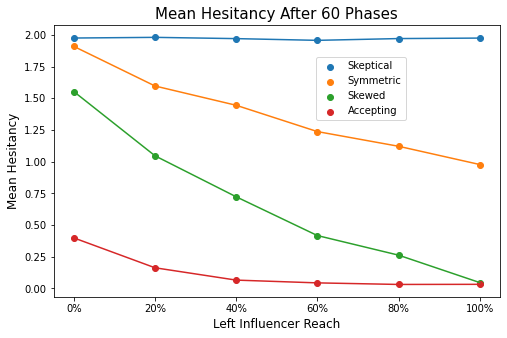

In [13]:
states = ["anti",
          "sym",
          "al",
          "or"]
counties = ["no_name_county",
            "no_name_county",
            "montgomery",
            "multnomah"
            ]
labels = ["Skeptical", 
          "Symmetric",
          "Skewed", 
          "Accepting"]

r = reaches

fig, ax = plt.subplots(figsize = (8,5))
for i in range(len(states)):
    mean = []
    s = states[i]
    c = counties[i]
    for r in reaches:
        result_path = path + "{}/{}/simulation_results_{}.pq".format(s,c,r)
        df = pd.read_parquet(result_path)
        df.columns = [int(c) for c in df.columns]
        mean.append(df.iloc[:,-1].mean())
    
    ax.scatter(reaches,mean, label = labels[i])
    ax.plot(reaches,mean)

ax.set_xlabel("Left Influencer Reach", fontsize = 12)
ax.set_xticks([0,2,4,6,8,10])
ax.set_xticklabels(["{}%".format(10*i) for i in [0,2,4,6,8,10]])
ax.set_ylabel("Mean Hesitancy", fontsize = 12)
ax.set_title("Mean Hesitancy After 60 Phases", fontsize = 15)
plt.legend(loc = "upper right", bbox_to_anchor = (.8,.9))        
plt.plot()
plt.show()